# Напишите заголовок проекта здесь

- Автор: Саватнеева Виктория
- Дата: 17.08.2025

### Цели и задачи проекта

<font color='#777778'>Целью проекта является проведение исследовательского анализа рынка для определения формата заведения для открытия. 
Задачами будет являться предобработка данных и их анализ с поиском аномальных значений, дубликатов, взаимосвязи между данными и их влиянием друг на друга.</font>

### Описание данных

<font color='#777778'>Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:
- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- seats — количество посадочных мест.

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.

1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговый вывод и рекомендации </font>

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [11]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [13]:
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

In [14]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [15]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о местах питания г. Москвы с адресом, графиком работы, количеством посадочных мест.

После первичного анализа данных можно сделать следующие выводы:
- Большинство представленных данных содержат текстовые значения и хранятся в типе данных `object`.
- Пропуски содержатся в столбцах `hours` и `seats` . Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `rest_price.csv`.

In [16]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [17]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена ценовая политика мест общественного питания  г. Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Большинство представленных данных содержат текстовые значения и хранятся в типе данных `object`.
- Пропуски содержатся во всех столбцах, кроме столбца с идентификатором заведения. Скорее всего пропуски связаны с отсутствием ценовой статистики у большинства заведений.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

Объединим датафреймы по идентификатору заведения и используем левое присоединение, во избежание потери данных большинства идентификаторов, которые отсутствуют во втором датафрейме.

In [18]:
df = pd.merge(rest_info, rest_price, on='id', how='left')

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

Изучим количество пропусков в данных:

In [19]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [20]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

При объединении датафреймов пропуски в некоторых столбцах стали занимать более большую часть от общего объема данных, доходя до 93%.
Причинами возникновения пропусков могут быть: 
- отсутствие статистических данных
- не произошло факта внесения данных в общий массив по разным причинам (человеческий фактор)
- пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup` зависят от значений столбца `avg_bill`. А столбец `avg_bill` в свою очередь зависит от статистических данных и от наличия позиций в меню. Например, капучино может не быть в меню (получаем пропуск в столбце `middle_coffee_cup`, а может наоборот содержаться статистика по цене чашки капучино, а не по среднему чеку (получаем пропуск в столбце `middle_avg_bill`)

Считаю, что заменять пропуски на усредненные значения некорректно, т.к. каждое заведение уникально и "среднее по больнице" здесь не будет работать, но и удалять большое количество пропусков тоже будет некорректно, поэтому оставим все, как есть.

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

К наиболее вероятным для появления дубликатов относятся столбцы с идентификатором, названием и адресом заведений. Проведем проверку на неявные дупликаты:

In [21]:
df.duplicated(subset='name').sum()

2792

In [22]:
df.duplicated(subset='address').sum()

2653

In [23]:
df.duplicated(subset='id').sum()

0

Во всех перечисленных выше столбцах неявные дубликаты отсуствуют только в столбце с идентификатором, тогда проверим наличие полных дубликатов:

In [24]:
df.duplicated().sum()

0

Удалим неявные дубликаты в столбцах `name` и `address`:

In [25]:
df = df.drop_duplicates(subset=['name', 'address'], keep=False)

Создадим новый столбец `is_24_7`с обозначением того, что заведение работает круглосуточно, то есть 24/7:
- логическое значение True — если заведение работает круглосуточно;
- логическое значение False — в противоположном случае.

In [26]:
def hour(hours):
    if "круглосуточно" in str(hours):
        return True
    else:
        return False

# Применение функции к столбцу hours и создание нового столбца is_24_7
df['is_24_7'] = df['hours'].apply(hour)


Проверим корректность добавления нового столбца и выведем сводную таблицу:

In [27]:
pivot = df.pivot_table(values='id', 
                       index='hours', 
                       columns='is_24_7', 
                       aggfunc='count')
print(pivot.tail())

is_24_7                                             False  True 
hours                                                           
ср-пт 15:00–00:00                                     1.0    NaN
чт 18:00–00:00; пт,сб 15:00–06:00; вс 15:00–00:00     1.0    NaN
чт 20:00–02:00; пт,сб 20:00–06:00                     1.0    NaN
чт круглосуточно, перерыв 10:00–20:00; сб кругл...    NaN    1.0
чт-вс 20:00–06:00                                     1.0    NaN


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В результате предварительной обработки данных были выполнены следующие действия:

- Изучены пропуски в данных. Пропуски обнаружены в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`. Наибольшее количество пропусков содержится в последнем объявленном столбце. Учитывая, что данные в двух послених столбцах зависят от данных столбца `avg_bill`, пропуски оставили без изменений, ошибки здесь нет. Пропуски в остальных перечисленных столбцах скорее всего связаны с отсутствием статистических данных по заведениям. Думаю, что пропуски корректно оставить и это не будет являться ошибкой.
- Данные были проверены на наличие явных и скрытых дубликатов: неявные дупликаты были удалены, а явные не были обнаружены.


## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [28]:
# Посмотрим, на какие категории делятся заведения в датафрейме
print(df['category'].unique())

['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


In [29]:
# Посчитаем количество заведений в каждой категории
count_category = df.groupby('category')['id'].count()
print(count_category)

category
бар,паб             765
булочная            256
быстрое питание     603
кафе               2378
кофейня            1413
пиццерия            633
ресторан           2043
столовая            315
Name: id, dtype: int64


Посмотрим на значения в долях:

In [30]:
category_shares = df['category'].value_counts(normalize=True)

print(category_shares)

кафе               0.282893
ресторан           0.243041
кофейня            0.168094
бар,паб            0.091006
пиццерия           0.075303
быстрое питание    0.071734
столовая           0.037473
булочная           0.030454
Name: category, dtype: float64


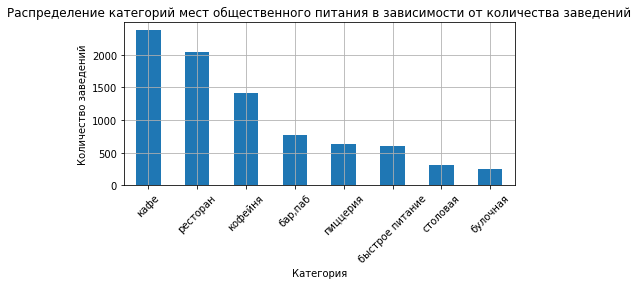

In [31]:
# Построим столбчатую диаграмму для визуализации количества заведений по выделенным категориям:
plt.figure(figsize=(7, 3))

df.groupby('category')['id'].count().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение категорий мест общественного питания в зависимости от количества заведений'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Видим, что из всех категорий по количеству заведений в Москве превалируют кафе, после них рестораны и на третьем месте кофейни. Скорее всего категория "кафе" более конкурентная среда среди других выделенных категорий, если количество заведений в этой категории более всего. Это первичный вывод, исследуем и другие метрики далее.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [32]:
# Посмотрим, какие административные районы выделены для заведений в датафрейме
print(df['district'].unique())

['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


In [33]:
# Посмотрим в цифрах, в каких из административных районах превалирует количество заведений по выделенным категориям
count_district = df.groupby('district')['id'].count()
print(count_district)

district
Восточный административный округ            798
Западный административный округ             851
Северный административный округ             900
Северо-Восточный административный округ     891
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: id, dtype: int64


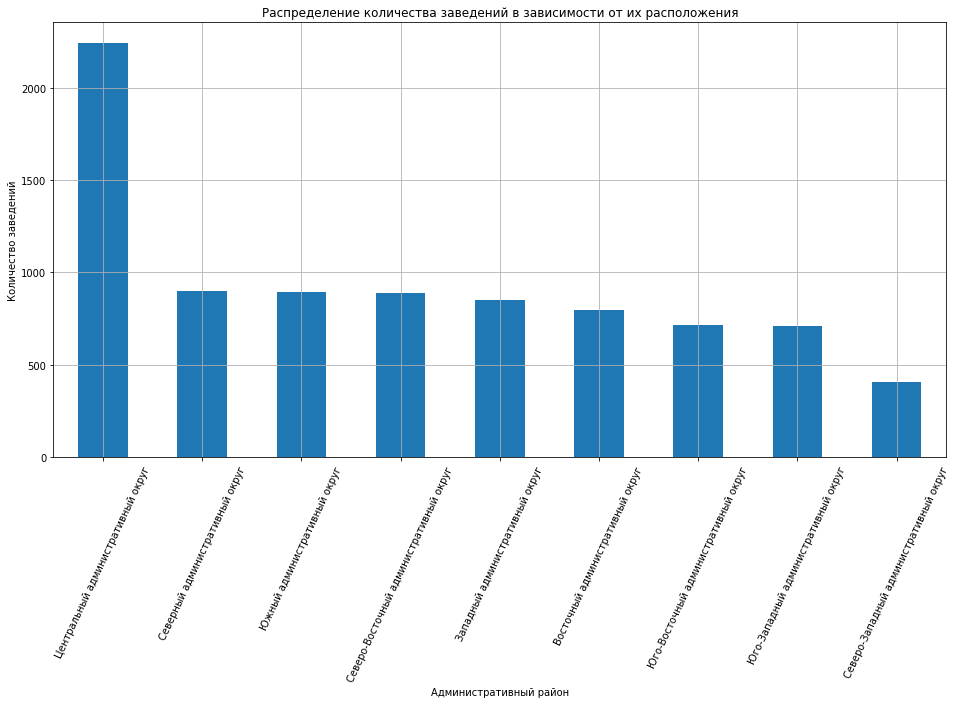

In [34]:
# Построим столбчатую диаграмму для визуализации данных количества заведений по выделенным административным районам

plt.figure(figsize=(16, 8))

df.groupby('district')['id'].count().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=65, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений в зависимости от их расположения'
)

# Настраиваем оформление графика
plt.xlabel('Административный район')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Видим, что больше всего заведений сосредоточено в ЦАО Москвы, проанализируем, сколько всего заведений расположено в ЦАО:

In [35]:
filtered_category_district = df[df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending=False)
print(filtered_category_district)

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: id, dtype: int64


Визуализируем распределение количества заведений каждой категории в ЦАО:

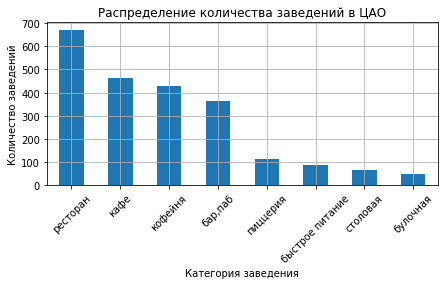

In [36]:
plt.figure(figsize=(7, 3))

filtered_category_district.plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из графика видно, что в центре Москвы больше всего сосредоточено ресторанов. Думаю, что это наиболее маржинальная и презентабельная категория для расположения в центре столицы. Скорее всего, в данном административном районе выгоднее открывать рестораны, чем другие категории, хотя и уровень конкуренции также будет выше, в сравнении с другими категориями.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

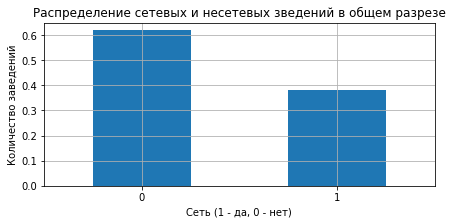

In [37]:
# Визуализируем распределение сетевых и несетевых заведений по всем данным:

plt.figure(figsize=(7, 3))

df['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика — столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение сетевых и несетевых зведений в общем разрезе'
)

# Настраиваем оформление графика
plt.xlabel('Сеть (1 - да, 0 - нет)')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

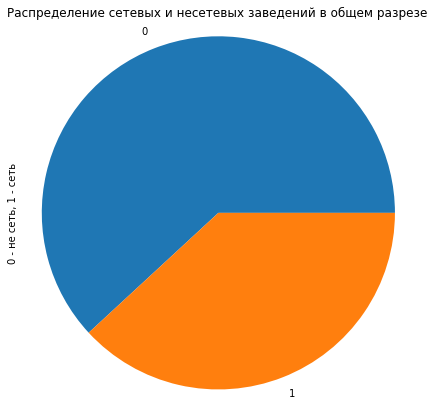

In [38]:
plt.figure(figsize=(7, 7)) 

df['chain'].value_counts(normalize=True).plot(
    kind='pie',
    legend=False,
    title='Распределение сетевых и несетевых заведений в общем разрезе'
)

# Настраиваем оформление графика
plt.axis('equal')  # Делаем диаграмму круговой, а не эллиптической
plt.ylabel('0 - не сеть, 1 - сеть') 

# Выводим график
plt.show()

Из графика видно, что в общем разрезе данных 62% заведений не являются сетевыми, и только 38% сетевые, посмотрим в разрезе категорий заведений:

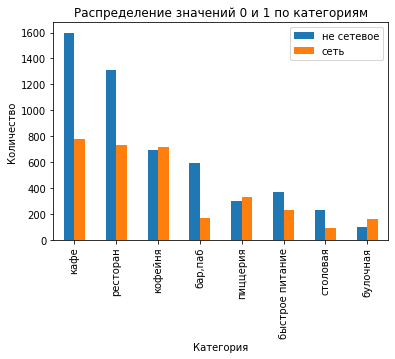

In [39]:
grouped_df = df.groupby('category')['chain'].value_counts().unstack(fill_value=0)
grouped_df['total'] = grouped_df.sum(axis=1)  # добавляем столбец с суммой значений
grouped_df_sorted = grouped_df.sort_values(by='total', ascending=False)  # сортируем по сумме

# Строим гистограмму
grouped_df_sorted.drop(columns=['total']).plot(kind='bar')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Распределение значений 0 и 1 по категориям')
plt.legend(['не сетевое', 'сеть'])
plt.show()

Видим, что чаще всего сетевыми бывают кофейни, рестораны и кафе, но также и в разрезе кафе большое количество заведений не является сетевым, как и в категории ресторанов. Кофейни наравне бывают как сетевые, так и не сетевые, но количество сетевых немного превалирует.


### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.

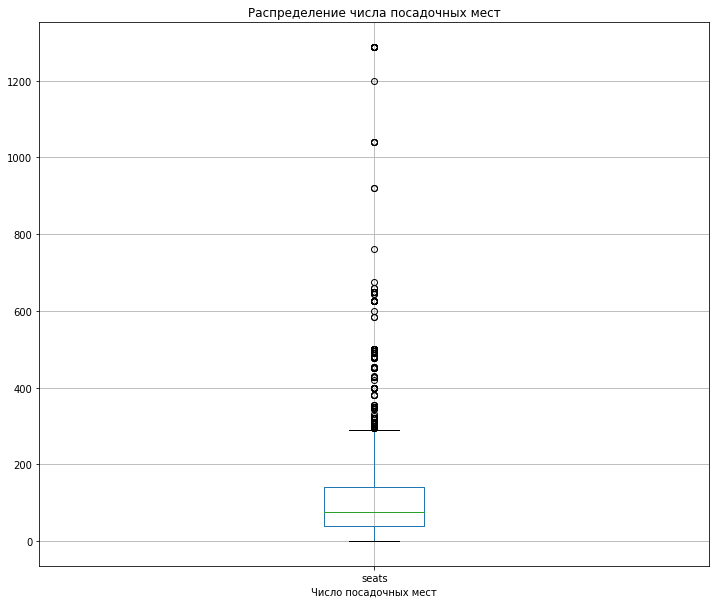

In [40]:
# Строим диаграмму размаха методом boxplot()
boxplot = df.boxplot(column='seats',
                     vert=True, 
                     figsize=(12, 10))

# Добавляем заголовок и метку оси X
boxplot.set_title('Распределение числа посадочных мест')
boxplot.set_xlabel('Число посадочных мест')

plt.show()

Из диаграммы размаха видим, что есть большое количество выбросов в стороне максимума. Скорее всего, такие выбросы могут быть связаны с сетевыми заведениями. Возможно, для всех сетевых заведений было посчитано общее количество мест и занесено в каждую точку. 

Посмотрим распределение посадочных мест внутри каждой категории:

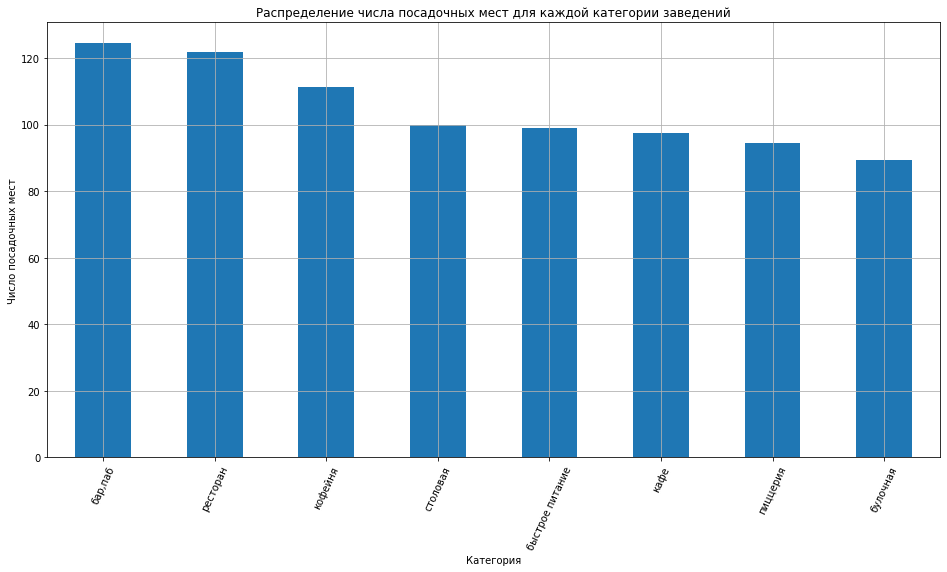

In [41]:
# Построим столбчатую диаграмму для визуализации числа посадочных мест для каждой категории заведений

plt.figure(figsize=(16, 8))

df.groupby('category')['seats'].mean().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=65, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение числа посадочных мест для каждой категории заведений'
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Число посадочных мест')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Для визуализации наиболее типичного числа посадочных мест для каждой категории заведения выбрали "среднее" по категории. Видим, что наибольшее количество посадочных мест в данной выборке у баров, пабов, ресторанов и кофеен. Для баров, пабов и кофеен это скорее аномальные значения, чем действительные, так как в основном это небольшие заведения, не рассчитанные на такое количество посадочных мест.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

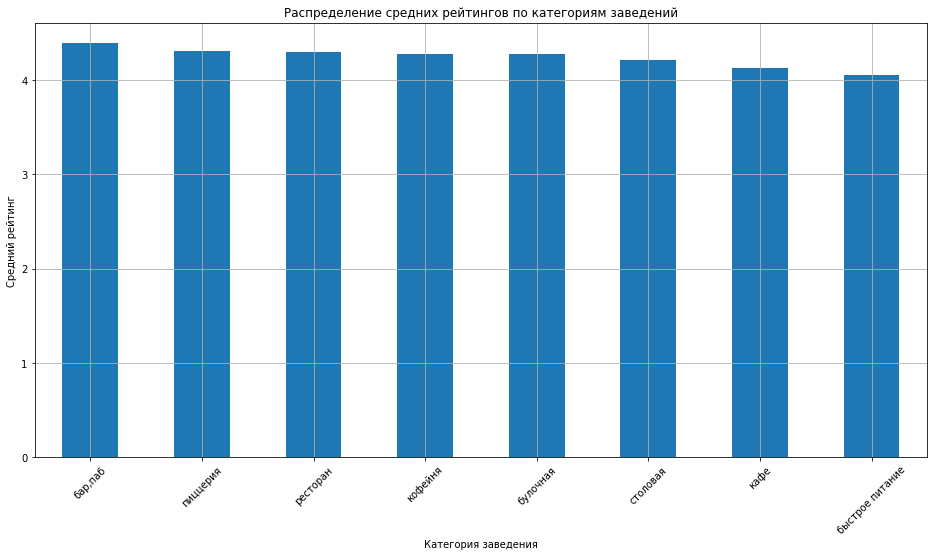

In [42]:
# Визуализируем распределение средних рейтингов по категориям заведений 
plt.figure(figsize=(16, 8))

df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=45, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение средних рейтингов по категориям заведений'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Исходя из полученной диаграммы, видим, что абсолютно все категории имеют рейтинг выше 4 и по значениям отличаются не очень сильно. Самый низкий рейтинг имеют точки быстрого питания, а самый высокий - бары и пабы. Кофейня, пиццерия, ресторан, столовая и булочная имеют схожие рейтинги и мало отличаются друг от друга.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [43]:
# Импортируем библиотеку phik и построим корреляционную матрицу:
    
!pip install phik
import phik

In [47]:
columns_to_use = ['category', 'district', 'chain', 'seats', 'price', 'rating', 'is_24_7']
correlation_matrix = df[columns_to_use].phik_matrix()
rating_correlations = correlation_matrix.loc['rating']
print(rating_correlations.sort_values(ascending=False))

interval columns not set, guessing: ['chain', 'seats', 'rating']
rating      1.000000
price       0.220295
district    0.200691
category    0.190003
is_24_7     0.144762
chain       0.108092
seats       0.000000
Name: rating, dtype: float64


Наибольшая корреляция рейтинга заведений наблюдается с ценовой категорией (0.22) и местоположением (0.2). Для остальных признаков коэффициент корреляции снижается с 0.19 до 0.

Перед тем как перейти к дальнейшему анализу, визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn:

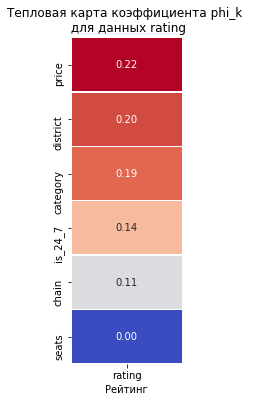

In [49]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг')

# Выводим график
plt.show()

Посмотрим на самую сильную связь рейтинга с ценовой категорией:

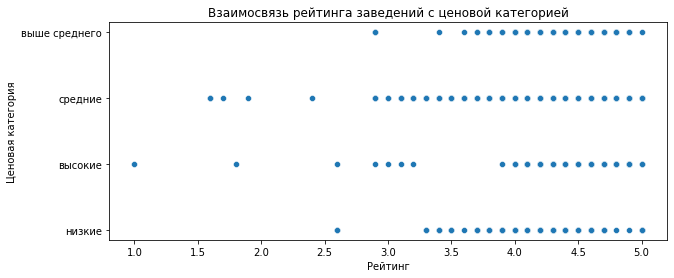

In [51]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

sns.scatterplot(x='rating', y='price', data=df)

plt.title('Взаимосвязь рейтинга заведений с ценовой категорией')
plt.xlabel('Рейтинг')
plt.ylabel('Ценовая категория')
plt.show()

На графике нет четкого направления линейной зависимости, поэтому сложно говорить о силе связи между рейтингом заведений и ценовой категорией

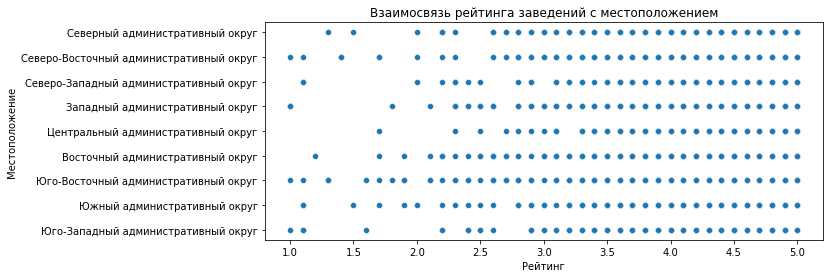

In [53]:
# Создаём контейнер графика
plt.figure(figsize=(10, 4))

sns.scatterplot(x='rating', y='district', data=df)

plt.title('Взаимосвязь рейтинга заведений с местоположением')
plt.xlabel('Рейтинг')
plt.ylabel('Местоположение')
plt.show()

Также, как и на графике выше, видим разброс данных в зависимости от рейтинга и местоположения заведения, но четкой линейной зависимости здесь не прослеживается, поэтому никакой закономерности выявить не можем.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [35]:
# Отфильтруем сетевые заведения
filtered_df = df.loc[df['chain'] == 1]

# Сгруппируем данные по названию заведений и категории, вычислим количество и средний рейтинг
top_15 = filtered_df.groupby(['name', 'category'])['rating'].agg(['count', 'mean'])

# Отсортируем полученные данные по количеству заведений в порядке убывания
top_15 = top_15.sort_values(by='count', ascending=False)

# Выведем топ-15 мест по количеству заведений и их средний рейтинг
print(top_15.head(15))

                                              count      mean
name                                category                 
Шоколадница                         кофейня     119  4.178151
Домино'с Пицца                      пиццерия     76  4.169737
Додо Пицца                          пиццерия     74  4.286486
One Price Coffee                    кофейня      71  4.064789
Яндекс Лавка                        ресторан     69  3.872464
Cofix                               кофейня      65  4.075385
Prime                               ресторан     49  4.114286
КОФЕПОРТ                            кофейня      42  4.147619
Кулинарная лавка братьев Караваевых кафе         39  4.394872
Теремок                             ресторан     36  4.105556
CofeFest                            кофейня      31  3.977419
Чайхана                             кафе         26  3.946154
Буханка                             булочная     25  4.416000
Drive Café                          кафе         24  4.025000
Кофемани

Из полученного массива данных видим, что наибольшее количество точек у Шоколадницы с рейтингом заведений 4,17.

Построим тепловую карту средних рейтингов заведений с визуализацией их названия и категории, к которой они относятся:

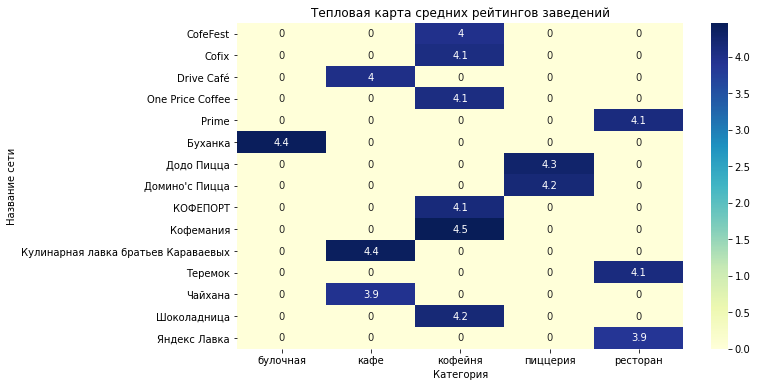

In [36]:
pivot_table = top_15.head(15).pivot_table(index='name', columns='category', values='mean', fill_value=0)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.title('Тепловая карта средних рейтингов заведений')
plt.xlabel('Категория')
plt.ylabel('Название сети')
plt.show()

На данной диаграмме видим, что больше всего заведений в данной выборке из категории "кофейня", причем у всех средний рейтинг выше или равен 4

Визуализируем самые популярные места общественного питания по количеству точек в городе:

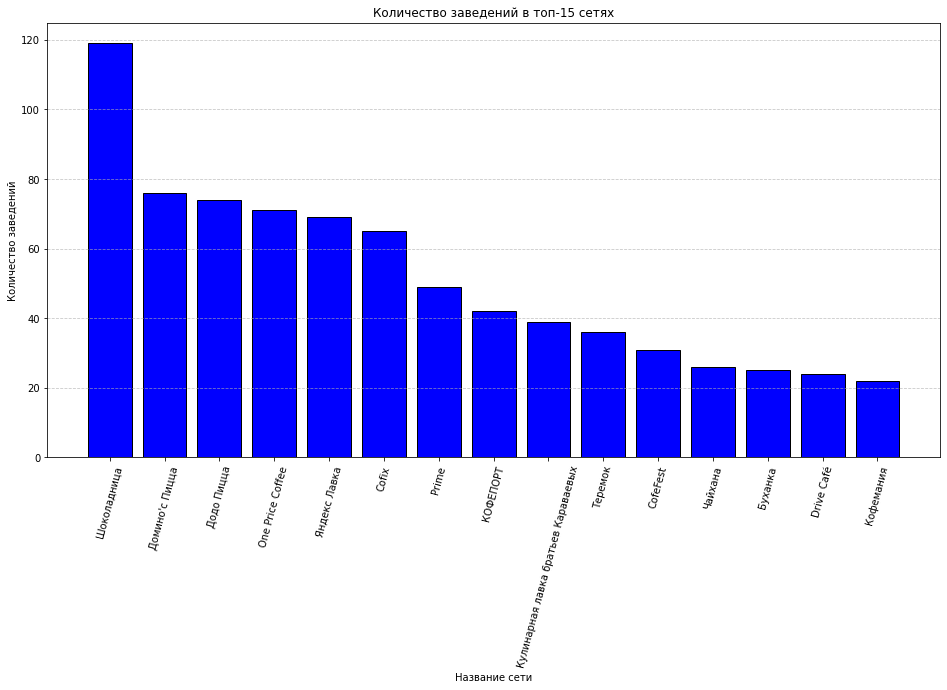

In [37]:
# Подготавливаем данные для диаграммы
top_15_count = top_15.head(15)['count']
names = top_15_count.index.get_level_values('name')

# Построение столбчатой диаграммы
plt.figure(figsize=(16, 8))
plt.bar(names, top_15_count, color='blue', edgecolor='black')
plt.title('Количество заведений в топ-15 сетях')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
plt.xticks(rotation=75)  # Поворот названий сетей для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Видим, что наибольшее количество заведений у Шоколадницы, а наименьшее - у Кофемании. В среднем у большинства выбранных заведений не сильно разнится количество заведений по городу.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Визуализируем распределение среднего чека в зависимости от административного района Москвы:

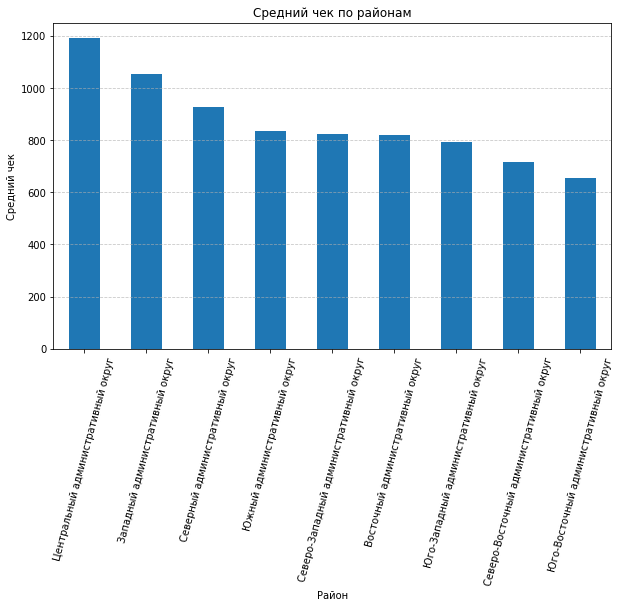

In [38]:
plt.figure(figsize=(16, 8))

df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Средний чек по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек')
plt.xticks(rotation=75)  # Поворот названий районов для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Видим, что наибольший средний чек выходит у посетителей в заведениях в районе ЦАО, затем уже в Западном округе и в Северном. Можно заметить, что удаленность от центра прямо влияет на разброс данных среднего чека: чем дальше заведение находится от центра, тем меньше средний чек. Например, ЮВАО и СВАО находятся намного дальше от центра, чем другие административные округи. Соответственно, средний чек в этих районах ниже, чем в других.

---


Посмотрим, зависит ли средняя стоимость одной чашки капучино в зависимости от района Москвы:

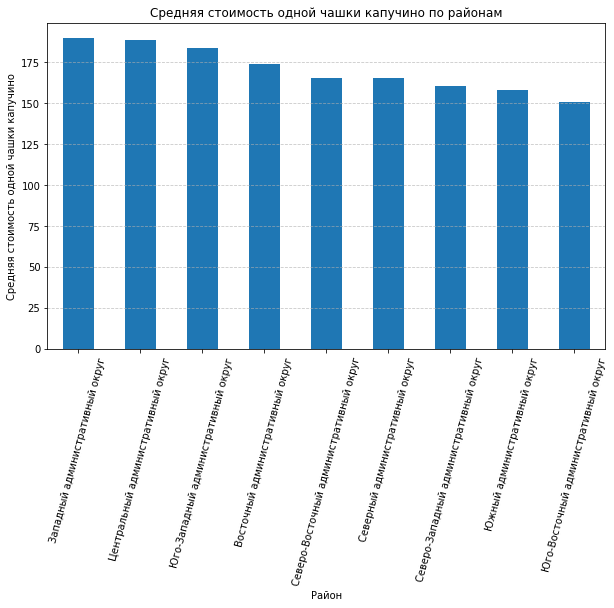

In [39]:
plt.figure(figsize=(16, 8))

df.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Средняя стоимость одной чашки капучино по районам')
plt.xlabel('Район')
plt.ylabel('Средняя стоимость одной чашки капучино')
plt.xticks(rotation=75)  # Поворот названий районов для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Видим, что район практически не влияет на среднюю стоимость одной чашки капучино, так как стоимость для всех районов находится примерно в одном диапазоне.

Значит, есть отличия только в стоимости блюд в разных заведениях, стоимость кофе практически одинакова по всей Москве. Наиболее низкая стоимость кофе, как и наименьший средний чек, зафиксированы в ЮВАО Москвы.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

Исходя из полученных результатов, подчеркнем основные моменты: 
- более всего по категориям общепита в Москве распространены кафе, рестораны и кофейни; 
- больше всего заведений расположено в ЦАО Москвы, а именно - ресторанов; 
- также наибольшее количество заведений не относится к сетевым. Рестораны и кафе практически в равном количестве есть как сетевые, так и нет, но больше не сетевых заведений среди этих категорий;
- число посадочных мест в большинстве своем имеет аномальные значения, что не бьется с реальностью;
- рейтинг для разных типов общепита практически одинаков и мало изменяется в зависимости от выбранной категории;
- связь рейтинга мало прослеживается с показателями, представленными в датафрейме, сложно отследить, от чего он зависит. Скорее всего это значение обусловлено качеством обслуживания, стоимостью блюд и их качеством, разнообразием меню, что не отражено в данных датафрейма;
- был выявлен топ-15 заведений по количеству точек в городе и их средний рейтинг. У общепита с наибольшим количеством заведений не самый высокий рейтинг. Скорее всего, постоянные посетители не оставляют отзывов в интернете и очень лояльны к данному заведению;
- была выявлена зависимость среднего чека в зависимости от расположения заведения: чем ближе заведение к центру, тем выше средний чек. Однако, данная зависимость не распространяется на стоимость капучино: стоимость кофе практически одинакова во всей Москве.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

В процессе выполнения данной работы была проведена предобработка данных: были выявлены и удалены неявные дупликаты, было выявлено большое количество пропусков, которое было решено оставить по причине взаимосвязи данных в столбцах между собой. Скорее всего причиной пропусков также может являться отсутствие статистики по заведению.

В процессе анализа было выявлено большое количество аномальных значений в столбце с числом посадочных мест. Предполагаю, что причиной возникновения аномалий являются сетевые заведения, для которых посчитано общее число посадочных мест и занесено в каждую строку сетевого заведения в зависимости от адреса. Точная причина возникновения аномалий неизвестна.

Для удобства анализа и предобработки данных информация из двух датафреймов была объединена в один по идентификатору заведения. Тип и названия данных в датафрейме корректны и не требовали изменений.

Был создан столбец, отражающий график работы заведений, а именно - были выделены заведения, работающие круглосуточно.

В процессе анализа данных были даны ответы на ключевые вопросы бизнеса, отразим самые важные в совокупности с рекомендациями:
наибольшее распространение получили кафе, рестораны и кофейни. Скорее всего люди чаще посещают именно эти категории общепита, предпочитая их другим. Думаю, более прибыльно открывать заведение именно в этих категориях, но также здесь нужно быть готовым к конкуренции, так как таких заведений больше всего. 

Также важно и расположение заведения, так как это напрямую влияет на стоимость блюд: чем ближе к центру, тем больше средний чек в заведениях. Здесь нужно заметить, что в самом центре Москвы больше ресторанов, чем кафе и кофеен, что тоже важно учитывать. 

Если задуматься о сетевом заведении, то в Москве они распространены меньше, чем те, что не относятся к сетевым. Значит, люди отдают предпочтение эксклюзивности. 

Рейтинг заведений практически одинаков в разрезе разных категорий. Думаю потому, что разные категории заведений ориентированы на разные слои населения, отсюда разные предпочтения и пожелания к месту общественного питания. Также важно заметить, что посетители одной категории заведений могут не являться посетителями другой категории. Здесь важно понять, на какую целевую аудиторию ориентированы инвесторы, так как это определит и категорию заведения, и его местоположение в совокупности со средним чеком.